# Question 119 - Chipotle item analysis part 2
Data Analysis Python Pandas Data Manipulation Data Visualization External Dataset

Suppose you are given a dataset of [Chipotle orders](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). Using these data, can you make a plot showing total revenue per menu item?

The solution will be written in Python, walking through the logic/calculation.

Note, you'll probably want to classify the menu items into categories, or you'll have a very long list.


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

df = pd.read_csv('q119_data.tsv', sep='\t')
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


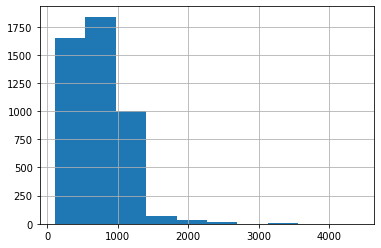

In [2]:
def convert_price_string_to_cents(s):
    """ convert a string like '$2.39' into integer 239, and '$3' into 300 """
    try:
        return int(float(s[1:])*100)
    except:
        return np.nan

def test_convert_price_string_to_cents(f):
    assert f('$3.66') == 366
    assert f('$3') == 300
    assert f('$3.666') == 366
    assert f('$$$$3.66') is np.nan

test_convert_price_string_to_cents(convert_price_string_to_cents)

df['item_price_cents'] = df['item_price'].map(convert_price_string_to_cents)
df['item_price_cents'].hist() # check the numbers aren't insane

In [3]:
(
    df
    .groupby('item_name')
    .agg({'item_price_cents': (lambda x:sum(x)/100)})
    .rename({'item_price_cents':'revenue'}, axis='columns')
    .sort_values(by='revenue', ascending=False)
)
    

,revenue
item_name,
Chicken Bowl,7342.73
Chicken Burrito,5575.82
Steak Burrito,3851.43
Steak Bowl,2260.19
Chips and Guacamole,2201.04
Chicken Salad Bowl,1228.75
Chicken Soft Tacos,1108.09
Veggie Burrito,934.77
Barbacoa Burrito,894.75


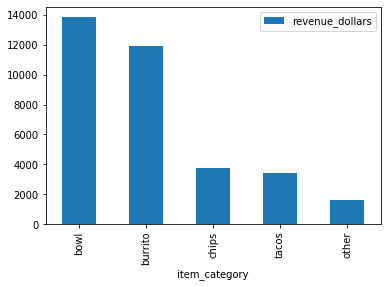

In [4]:
def categorize_item(item_name):
    name = str.lower(item_name)
    if 'burrito' in name:
        return 'burrito'
    if 'tacos' in name:
        return 'tacos'
    if 'chips' in name:
        return 'chips'
    if 'bowl' in name:
        return 'bowl'
    return 'other'

df['item_category'] = df['item_name'].map(categorize_item)

(
    df
    .groupby('item_category')
    .agg({'item_price_cents': (lambda x:sum(x)/100)})
    .rename({'item_price_cents':'revenue_dollars'}, axis='columns')
    .sort_values(by='revenue_dollars', ascending=False)
    .plot.bar()
)
    